<a href="https://colab.research.google.com/github/carloscesar182/ai_advanced_course/blob/main/Notebooks/MLAdvTechniques/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# importar as funcionalidades dos arquivos .py que fizemos upload
# funciona examente igual se tivesse importado da maneira tradicional que fizemos acima
from hopkins import *
from metric import *
from visual_assessment_of_tendency import *

In [ ]:
# desabilitar warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
# criar os 2 clusters
iris = datasets.load_iris()
clust1 = scale(iris.data) # usar scale para normalizar os dados
clust2 = scale(np.random.random((150,4))) # gera uma matriz com 150 linhas e 4 colunas de dados aleatórios

In [ ]:
print(clust2)

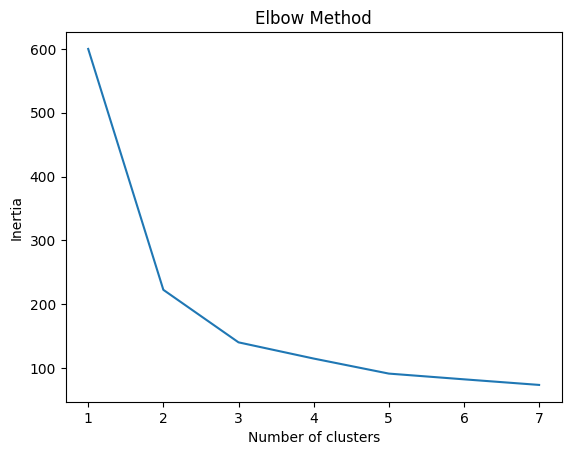

In [ ]:
# construir o grafico de elbow do cluster 1
# fazer criando um cluster kmeans pra ele gerar uma propriedade interna e a gente le ela pra produzir o grafico de elbow
inertia = [] # lista vazia pra armazenar o valor de inertia pra cada teste
for i in range(1,8):
  kmeans = KMeans(n_clusters=i, n_init='auto') # define os pontos de inicialização automaticamente
  kmeans.fit(clust1)
  inertia.append(kmeans.inertia_) # ler os dados de inertia gerados pelo modelo e fazer um append na nossa lista
plt.plot(range(1,8), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

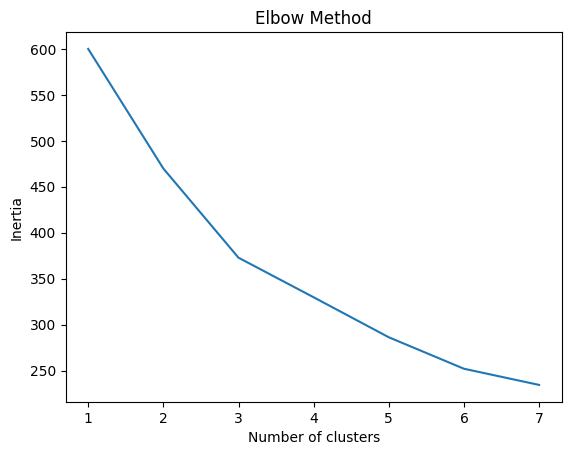

In [ ]:
# construir o grafico de elbow do cluster 2
inertia = []
for i in range(1,8):
  kmeans = KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(clust2)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,8), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# usar a técnica de hopkings pra medir a qualidade dos clusters
# quanto mais prox de 0, melhor
hopkins(clust1, 150)

In [ ]:
hopkins(clust2, 150)

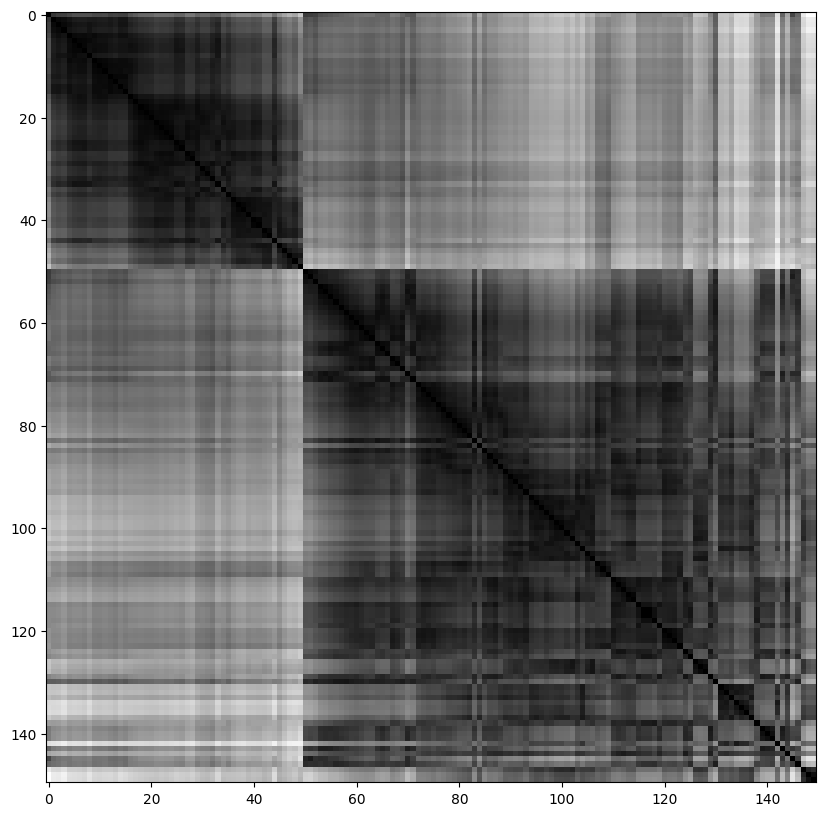

In [ ]:
# tecnicas visuais pra medir a qualidade dos clusters
vat(clust1)

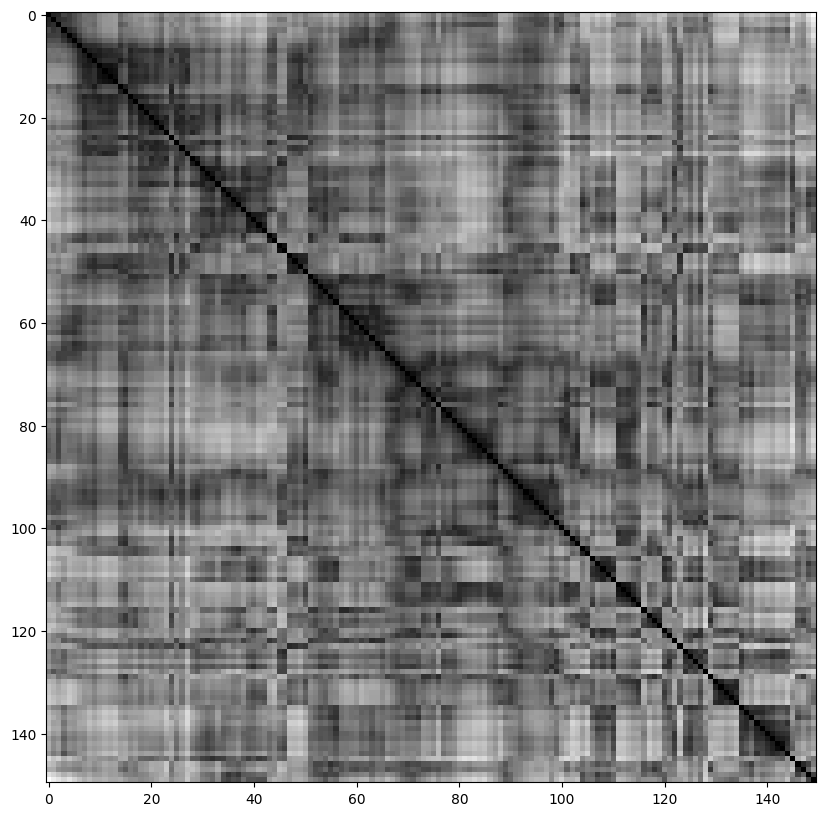

In [ ]:
vat(clust2)

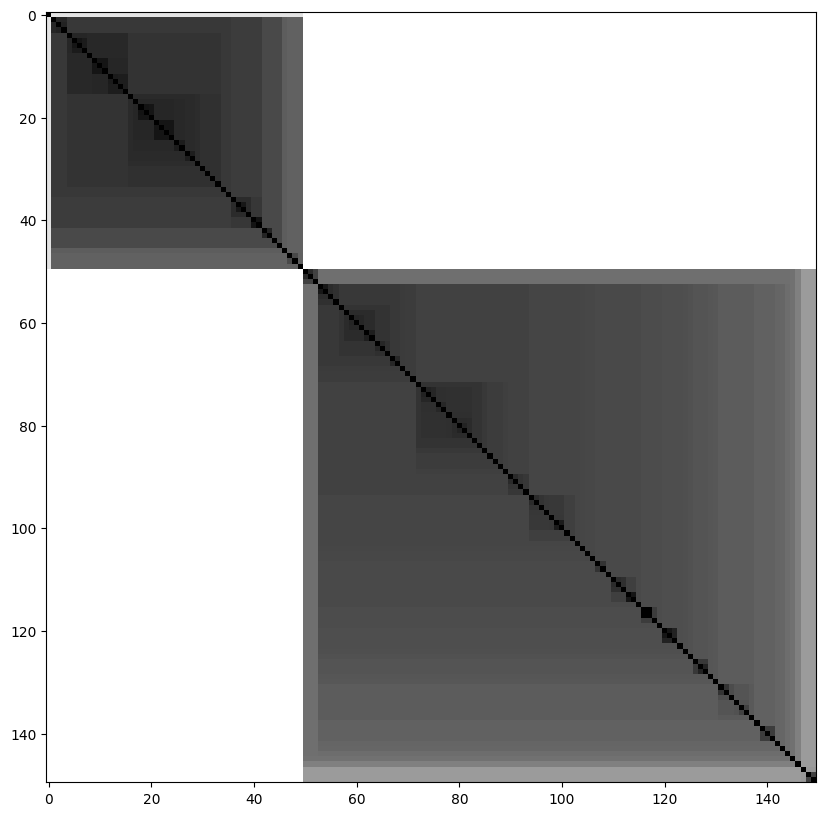

In [ ]:
ivat(clust1) # visualização mais clara

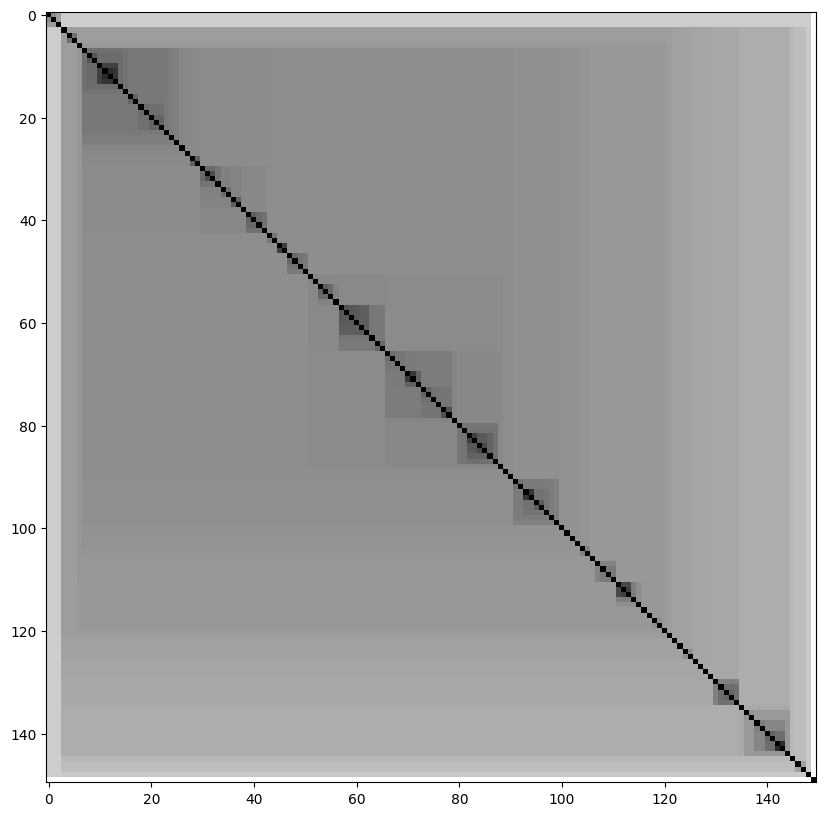

In [ ]:
ivat(clust2)

In [ ]:
# assess tendency by metric para o clust1
# tecnica que mostra o número ideal de clusters
# m = assess_tendency_by_metric(clust1, 'silhouette', 5) # metrica silhouette
# m = assess_tendency_by_metric(clust1, 'davies_bouldin', 5) # metrica davies_bouldin
m = assess_tendency_by_metric(clust1, 'calinski_harabasz', 5) # metrica calinski_harabasz
print(m)

(np.int64(2), array([251.34933946, 157.36015312, 206.55006422, 202.89437529]))


In [ ]:
# assess tendency by metric para o clust2
# m = assess_tendency_by_metric(clust2, 'silhouette', 5) # metrica silhouette
# m = assess_tendency_by_metric(clust2, 'davies_bouldin', 5) # metrica davies_bouldin
m = assess_tendency_by_metric(clust2, 'calinski_harabasz', 5) # metrica calinski_harabasz
print(m)

In [ ]:
# assess tendecy by mean metric score que busca a média dos 3 métodos acima
m = assess_tendency_by_mean_metric_score(clust1, 5)
print(m)

In [ ]:
m = assess_tendency_by_mean_metric_score(clust2, 5)
print(m)